In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [76]:
# Define the path to the Excel file
file_path=r"C:\Users\praky\Downloads\Production_Data.xlsx"

In [77]:
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

In [78]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [79]:
# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

# Data Preprocessing



In [80]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [81]:
# List of columns to be label encoded

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [82]:
# Encode categorical variables except the target variable

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [83]:
# Encode categorical variables except the target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [84]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [85]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [86]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [91]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model


In [90]:
# Make predictions

y_pred = rf_model.predict(X_test)

In [92]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[785  56]
 [134 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       841
           1       0.80      0.63      0.70       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [93]:

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


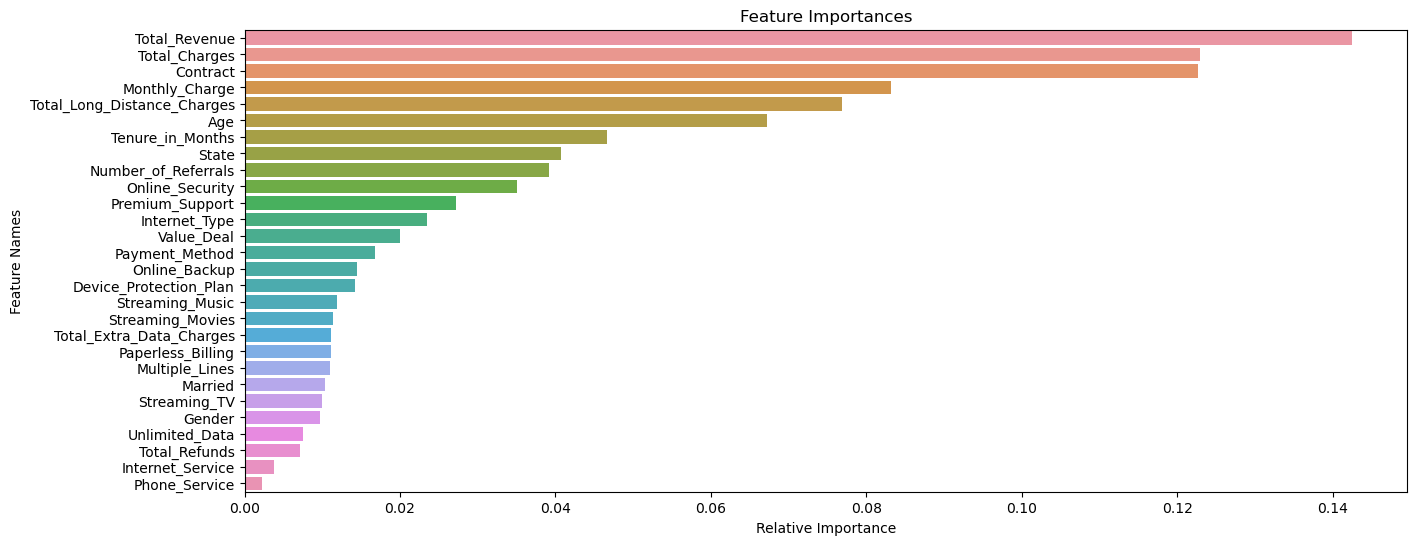

In [94]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [20]:
#Use Model for Prediction on New Data

In [95]:
file_path=r"C:\Users\praky\Downloads\Production_Data.xlsx"

In [96]:
sheet_name = 'vw_JoinData'

In [97]:
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [98]:
print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [99]:
original_data = new_data.copy()

In [100]:
customer_ids = new_data['Customer_ID']

In [101]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [102]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [103]:
new_predictions = rf_model.predict(new_data)

In [104]:
original_data['Customer_Status_Predicted'] = new_predictions

In [105]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [106]:
original_data.to_csv(r"C:\Users\praky\Downloads\Production1_Data.xlsx", index=False)